### POS_CASH balance, installments_payments, credit_card_balance data processing, EDA, MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### BALANCE dataset loading, column type change for memory size reduction

In [9]:
def get_balance_data():
    pos_dtype = {
        'SK_ID_PREV':np.uint32, 'SK_ID_CURR':np.uint32, 'MONTHS_BALANCE':np.int32, 'SK_DPD':np.int32,
        'SK_DPD_DEF':np.int32, 'CNT_INSTALMENT':np.float32, 'CNT_INSTALMENT_FUTURE':np.float32        
    }
    install_dtype = {
        'SK_ID_PREV':np.uint32, 'SK_ID_CURR':np.uint32, 'NUM_INSTALMENT_NUMBER':np.int32, 'NUM_INSTALMENT_VERSION':np.float32,
        'DAYS_INSTALMENT':np.float32, 'DAYS_ENTRY_PAYMENT':np.float32, 'AMT_INSTALMENT':np.float32, 'AMT_PAYMENT':np.float32
    }
    card_dtype = {
        'SK_ID_PREV':np.uint32, 'SK_ID_CURR':np.uint32, 'MONTHS_BALANCE':np.int16,
        'AMT_CREDIT_LIMIT_ACTUAL':np.int32, 'CNT_DRAWINGS_CURRENT':np.int32, 'SK_DPD':np.int32,'SK_DPD_DEF':np.int32,
        'AMT_BALANCE':np.float32, 'AMT_DRAWINGS_ATM_CURRENT':np.float32, 'AMT_DRAWINGS_CURRENT':np.float32,
        'AMT_DRAWINGS_OTHER_CURRENT':np.float32, 'AMT_DRAWINGS_POS_CURRENT':np.float32, 'AMT_INST_MIN_REGULARITY':np.float32,
        'AMT_PAYMENT_CURRENT':np.float32, 'AMT_PAYMENT_TOTAL_CURRENT':np.float32, 'AMT_RECEIVABLE_PRINCIPAL':np.float32,
        'AMT_RECIVABLE':np.float32, 'AMT_TOTAL_RECEIVABLE':np.float32, 'CNT_DRAWINGS_ATM_CURRENT':np.float32,
        'CNT_DRAWINGS_OTHER_CURRENT':np.float32, 'CNT_DRAWINGS_POS_CURRENT':np.float32, 'CNT_INSTALMENT_MATURE_CUM':np.float32
    }
    data_path = 'D:\workspace1\Kaggle_Advanced_ML\data'
    
    pos_bal = pd.read_csv(os.path.join(data_path, 'POS_CASH_balance.csv'), dtype=pos_dtype)
    install = pd.read_csv(os.path.join(data_path, 'installments_payments.csv'), dtype=install_dtype)
    card_bal = pd.read_csv(os.path.join(data_path, 'credit_card_balance.csv'), dtype=card_dtype)
    
    return pos_bal, install, card_bal

pos_bal, install, card_bal = get_balance_data()

In [7]:
pos_bal_temp = pd.read_csv(os.path.join('D:\workspace1\Kaggle_Advanced_ML\data', 'POS_CASH_balance.csv'))
pos_bal_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [8]:
pos_dtype = {
        'SK_ID_PREV':np.uint32, 'SK_ID_CURR':np.uint32, 'MONTHS_BALANCE':np.int32, 'SK_DPD':np.int32,
        'SK_DPD_DEF':np.int32, 'CNT_INSTALMENT':np.float32, 'CNT_INSTALMENT_FUTURE':np.float32        
    }
pos_bal_temp1 = pd.read_csv(os.path.join('D:\workspace1\Kaggle_Advanced_ML\data', 'POS_CASH_balance.csv'), dtype=pos_dtype)
pos_bal_temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             uint32 
 1   SK_ID_CURR             uint32 
 2   MONTHS_BALANCE         int32  
 3   CNT_INSTALMENT         float32
 4   CNT_INSTALMENT_FUTURE  float32
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int32  
 7   SK_DPD_DEF             int32  
dtypes: float32(2), int32(3), object(1), uint32(2)
memory usage: 343.4+ MB


In [9]:
import gc
del pos_bal_temp
del pos_bal_temp1
gc.collect()

45

In [133]:
data_path = 'D:\workspace1\Kaggle_Advanced_ML\data'
app_train = pd.read_csv(os.path.join(data_path, 'application_train.csv'))
app_test = pd.read_csv(os.path.join(data_path, 'application_test.csv'))
apps = pd.concat([app_train, app_test])

In [134]:
app_train.shape, app_test.shape, apps.shape

((307511, 122), (48744, 121), (356255, 122))

In [15]:
pos_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


- Count based on SK_ID_CURR 
- Count based on SK_ID_PREV
- Unique SK_ID_PREV avg count based on SK_ID_CURR
- MONTHS_BALANCE, DAYS_INSTALMENT distribution

In [17]:
pos_bal.groupby('SK_ID_CURR')['SK_ID_CURR'].count().mean()

29.655444593360453

In [18]:
pos_bal.groupby('SK_ID_PREV')['SK_ID_PREV'].count().mean()

10.68150268336315

In [19]:
pos_bal.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().mean()

2.7763363894061412

In [20]:
pos_bal['MONTHS_BALANCE'].value_counts().head(30)

-10    216441
-11    216023
-9     215558
-12    214716
-8     214149
-13    210950
-7     210229
-14    208352
-6     206849
-15    204935
-5     200726
-16    200432
-17    195713
-4     193147
-18    190385
-19    184302
-3     183589
-20    179741
-21    173543
-2     169529
-22    167834
-23    162220
-24    155855
-25    148399
-26    142602
-27    136913
-28    131861
-29    127147
-30    122386
-31    117961
Name: MONTHS_BALANCE, dtype: int64

<AxesSubplot:>

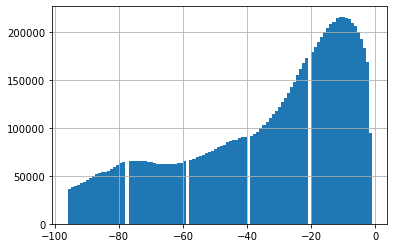

In [22]:
pos_bal['MONTHS_BALANCE'].hist(bins=100)

<AxesSubplot:>

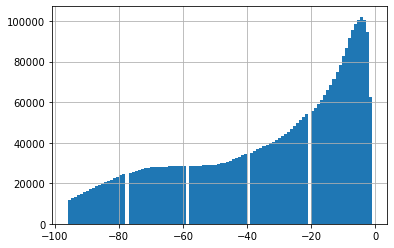

In [23]:
card_bal['MONTHS_BALANCE'].hist(bins=100)

<AxesSubplot:xlabel='MONTHS_BALANCE'>

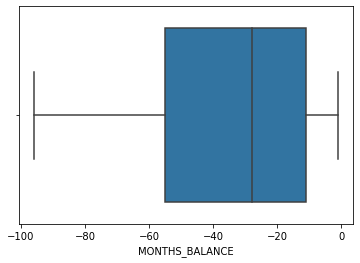

In [25]:
sns.boxplot(x=card_bal['MONTHS_BALANCE'])

<AxesSubplot:>

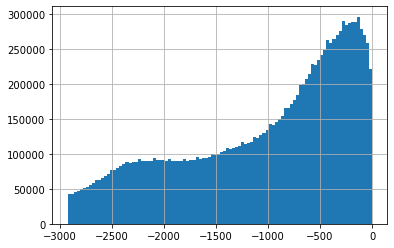

In [26]:
install['DAYS_INSTALMENT'].hist(bins=100)

### BALANCE dataset check for columns and Null
- POS_CACHE, INSTALL-> less NULL,
- CREDIT_CARD -> Features related to drawing : many nulls

In [27]:
pos_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             uint32 
 1   SK_ID_CURR             uint32 
 2   MONTHS_BALANCE         int32  
 3   CNT_INSTALMENT         float32
 4   CNT_INSTALMENT_FUTURE  float32
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int32  
 7   SK_DPD_DEF             int32  
dtypes: float32(2), int32(3), object(1), uint32(2)
memory usage: 343.4+ MB


In [28]:
pos_bal.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [29]:
install.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              uint32 
 1   SK_ID_CURR              uint32 
 2   NUM_INSTALMENT_VERSION  float32
 3   NUM_INSTALMENT_NUMBER   int32  
 4   DAYS_INSTALMENT         float32
 5   DAYS_ENTRY_PAYMENT      float32
 6   AMT_INSTALMENT          float32
 7   AMT_PAYMENT             float32
dtypes: float32(5), int32(1), uint32(2)
memory usage: 415.2 MB


In [30]:
install.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [31]:
card_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  uint32 
 1   SK_ID_CURR                  uint32 
 2   MONTHS_BALANCE              int16  
 3   AMT_BALANCE                 float32
 4   AMT_CREDIT_LIMIT_ACTUAL     int32  
 5   AMT_DRAWINGS_ATM_CURRENT    float32
 6   AMT_DRAWINGS_CURRENT        float32
 7   AMT_DRAWINGS_OTHER_CURRENT  float32
 8   AMT_DRAWINGS_POS_CURRENT    float32
 9   AMT_INST_MIN_REGULARITY     float32
 10  AMT_PAYMENT_CURRENT         float32
 11  AMT_PAYMENT_TOTAL_CURRENT   float32
 12  AMT_RECEIVABLE_PRINCIPAL    float32
 13  AMT_RECIVABLE               float32
 14  AMT_TOTAL_RECEIVABLE        float32
 15  CNT_DRAWINGS_ATM_CURRENT    float32
 16  CNT_DRAWINGS_CURRENT        int32  
 17  CNT_DRAWINGS_OTHER_CURRENT  float32
 18  CNT_DRAWINGS_POS_CURRENT    float32
 19  CNT_INSTALMENT_MATURE

In [32]:
card_bal.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

#### POS_CASH numerical features' histogram based on TARGET

In [135]:
# merge apps to get TARGET
pos_bal_app = pos_bal.merge(apps[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')
pos_num_columns = pos_bal_app.dtypes[pos_bal_app.dtypes != 'object'].index.tolist()
pos_num_columns = [column for column in pos_num_columns if column not in ['SK_ID_CURR', 'SK_ID_PREV', 'TARGET']]
print(pos_num_columns)

['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']


In [72]:
def show_hist_by_target(df, columns):
    cond_1 = df['TARGET']==1
    cond_0 = df['TARGET']==0
    
    for column in columns:
        print('column:', column)
        fig, axs = plt.subplots(figsize=(12,4), nrows=1, ncols=2, squeeze=False)
        sns.violinplot(x='TARGET', y=column, data=df[np.isfinite(df[column])], ax=axs[0][0])
        sns.histplot(df[cond_0 & np.isfinite(df[column])][column], label='0', color='blue',stat='density', bins = 100, ax=axs[0][1])
        sns.histplot(df[cond_1 & np.isfinite(df[column])][column], label='1', color='red', stat='density', bins = 100, ax=axs[0][1])

In [66]:
def show_hist_by_target_single(df, columns):
    cond_1 = df['TARGET']==1
    cond_0 = df['TARGET']==0
    
    for column in columns:
        print('column:', column)
        plt.figure(figsize=(4, 4))
        sns.histplot(df[cond_0][column], label='0', color='blue', kde=True, stat='density')
        sns.histplot(df[cond_1][column], label='1', color='red', kde=True, stat='density')

column: MONTHS_BALANCE
column: CNT_INSTALMENT
column: CNT_INSTALMENT_FUTURE
column: SK_DPD
column: SK_DPD_DEF


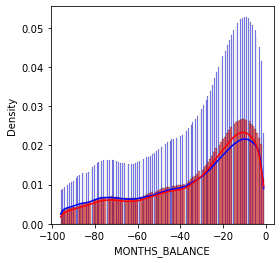

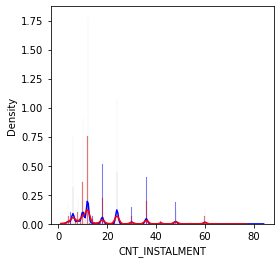

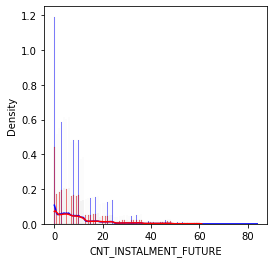

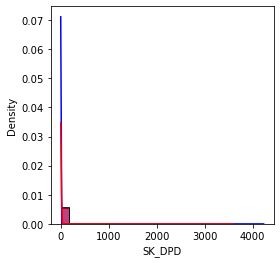

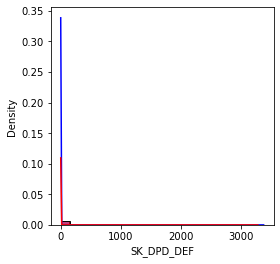

In [67]:
show_hist_by_target_single(pos_bal_app, pos_num_columns)

### INSTAllMENTS numerical features histogram based on TARGET

In [136]:
install_app = install.merge(apps[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')
install_num_columns = install_app.dtypes[install_app.dtypes!='object'].index.tolist()
install_num_columns = [column for column in install_num_columns if column not in ['SK_ID_PREV', 'SK_ID_CURR', 'TARGET']]
print(install_num_columns)

['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']


column: NUM_INSTALMENT_VERSION
column: NUM_INSTALMENT_NUMBER
column: DAYS_INSTALMENT
column: DAYS_ENTRY_PAYMENT
column: AMT_INSTALMENT
column: AMT_PAYMENT


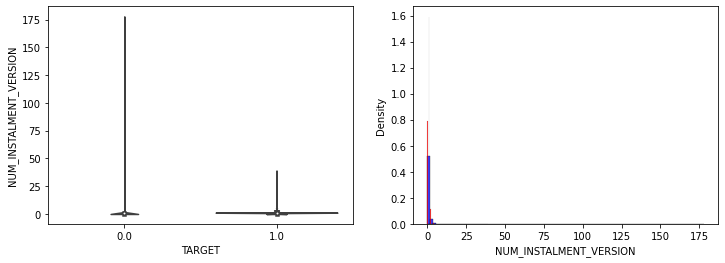

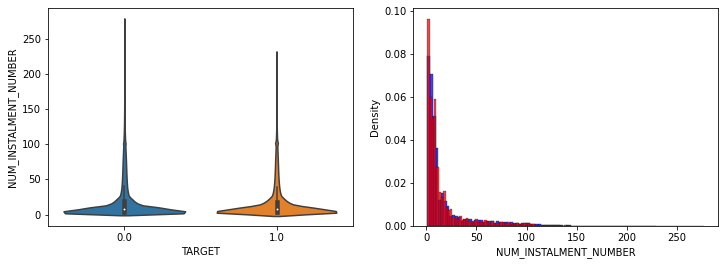

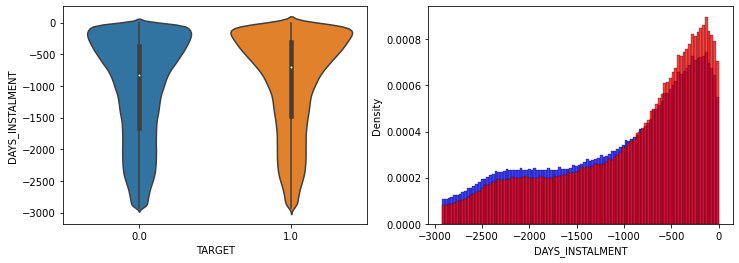

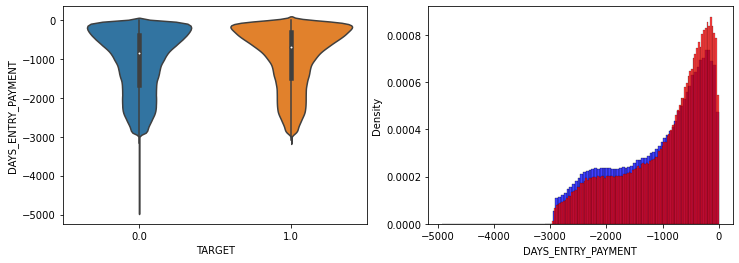

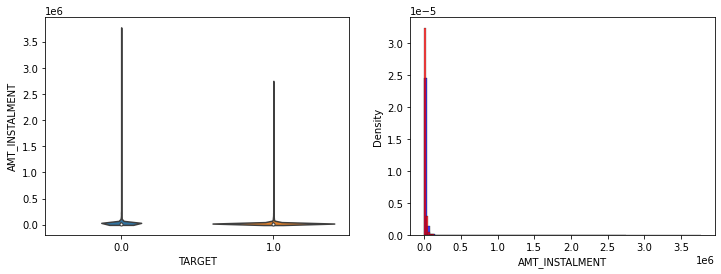

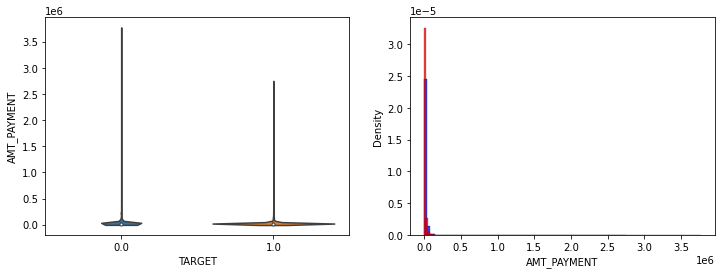

In [73]:
show_hist_by_target(install_app, install_num_columns)

#### CREDIT_CARD numerical features histogram based on TARGET

In [137]:
card_bal_app = card_bal.merge(apps[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')
card_num_columns = card_bal_app.dtypes[card_bal_app.dtypes!='object'].index.tolist()
card_num_columns = [column for column in card_num_columns if column not in ['SK_ID_PREV', 'SK_ID_CURR', 'TARGET']]
print(card_num_columns)

['MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF']


#### Categorical columns distribution
- 'NAME_CONTRACT_STATUS' column is the only column that is categorical

In [138]:
pos_bal['NAME_CONTRACT_STATUS'].value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

In [139]:
card_bal['NAME_CONTRACT_STATUS'].value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

#### POS_CASH_balance Feature Engineering

-SK_DPD

In [140]:
pos_bal['SK_DPD'].value_counts()

0       9706131
1         21872
2         17358
3         14403
4         12350
         ...   
3273          1
3272          1
3275          1
3277          1
4231          1
Name: SK_DPD, Length: 3400, dtype: int64

In [141]:
pos_bal.shape

(10001358, 8)

In [142]:
# SK_DPD>0, 0<SK_DPD<30, SK_DPD>120
cond_over_0 = pos_bal['SK_DPD']>0
cond_over_0_30 = cond_over_0 & (pos_bal['SK_DPD']<=30)
cond_over_30_120 = (pos_bal['SK_DPD']>30) & (pos_bal['SK_DPD']<120)
cond_over_120 = pos_bal['SK_DPD']>120

print('delayed ratio:     ', pos_bal[cond_over_0].shape[0]/pos_bal.shape[0])
print('delayed < 30:      ', pos_bal[cond_over_0_30].shape[0]/pos_bal.shape[0])
print('30 < delayed < 30: ', pos_bal[cond_over_0_30].shape[0]/pos_bal.shape[0])
print('delayed < 30:      ', pos_bal[cond_over_0_30].shape[0]/pos_bal.shape[0])

delayed ratio:      0.02951869136171308
delayed < 30:       0.01631468446584954
30 < delayed < 30:  0.01631468446584954
delayed < 30:       0.01631468446584954


In [143]:
pos_bal['POS_IS_DPD'] = pos_bal['SK_DPD'].apply(lambda x : 1 if x>0 else 0)
pos_bal['POS_IS_DPD_UNDER_120'] = pos_bal['SK_DPD'].apply(lambda x : 1 if (x>0 and x<120) else 0)
pos_bal['POS_IS_DPD_OVER_120'] = pos_bal['SK_DPD'].apply(lambda x: 1 if x>=120 else 0)

In [81]:
pos_bal[cond_over_120].head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,POS_IS_DPD,POS_IS_DPD_UNDER_120,POS_IS_DPD_OVER_120
2252,2562793,287880,-46,7.0,0.0,Active,1105,0,1,0,1
3507,1290101,322484,-37,6.0,0.0,Active,329,0,1,0,1
3996,2002705,413918,-48,6.0,0.0,Active,146,0,1,0,1
4438,1184431,369596,-44,6.0,0.0,Active,173,0,1,0,1
5234,1526249,275666,-39,12.0,0.0,Active,798,0,1,0,1


#### Aggregation columns using original columns and newly made columns

In [144]:
pos_bal_grp = pos_bal.groupby('SK_ID_CURR')
pos_bal_agg_dict = {
    # original columns
    'SK_ID_CURR':['count'],
    'MONTHS_BALANCE':['min','mean','max'],
    'SK_DPD':['min','mean','max'],
    # newly added columns
    'POS_IS_DPD':['mean','sum'], # mean : Ratio, sum : Count
    'POS_IS_DPD_UNDER_120':['mean','sum'],
    'POS_IS_DPD_OVER_120':['mean','sum']    
}

pos_bal_agg = pos_bal_grp.agg(pos_bal_agg_dict)
pos_bal_agg.columns = ['POS_'+'_'.join(column).upper() for column in pos_bal_agg.columns]

In [83]:
pos_bal_agg.head()

,POS_SK_ID_CURR_COUNT,POS_MONTHS_BALANCE_MIN,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_MAX,POS_SK_DPD_MIN,POS_SK_DPD_MEAN,POS_SK_DPD_MAX,POS_POS_IS_DPD_MEAN,POS_POS_IS_DPD_SUM,POS_POS_IS_DPD_UNDER_120_MEAN,POS_POS_IS_DPD_UNDER_120_SUM,POS_POS_IS_DPD_OVER_120_MEAN,POS_POS_IS_DPD_OVER_120_SUM
SK_ID_CURR,,,,,,,,,,,,,
100001,9,-96,-72.555556,-53,0,0.777778,7,0.111111,1,0.111111,1,0.0,0
100002,19,-19,-10.000000,-1,0,0.000000,0,0.000000,0,0.000000,0,0.0,0
100003,28,-77,-43.785714,-18,0,0.000000,0,0.000000,0,0.000000,0,0.0,0
100004,4,-27,-25.500000,-24,0,0.000000,0,0.000000,0,0.000000,0,0.0,0
100005,11,-25,-20.000000,-15,0,0.000000,0,0.000000,0,0.000000,0,0.0,0


#### More Recent MONTHS_BALANCE POS_CASH_BALANCE

In [145]:
cond_months = pos_bal['MONTHS_BALANCE'] > -20
pos_bal[cond_months].groupby('SK_ID_CURR')['SK_ID_CURR'].count().shape

(272296,)

In [146]:
pos_bal.groupby('SK_ID_CURR')['SK_ID_CURR'].count().shape

(337252,)

In [147]:
cond_months = pos_bal['MONTHS_BALANCE']>-20
pos_bal_m20_grp = pos_bal[cond_months].groupby('SK_ID_CURR')
pos_bal_agg_dict = {
    # original columns
    'SK_ID_CURR':['count'],
    'MONTHS_BALANCE':['min','mean','max'],
    'SK_DPD':['min','mean','max'],
    # newly added columns
    'POS_IS_DPD':['mean','sum'], # mean : Ratio, sum : Count
    'POS_IS_DPD_UNDER_120':['mean','sum'],
    'POS_IS_DPD_OVER_120':['mean','sum']    
}

pos_bal_m20_agg = pos_bal_m20_grp.agg(pos_bal_agg_dict)
pos_bal_m20_agg.columns = ['POS_M20'+'_'.join(column).upper() for column in pos_bal_m20_agg.columns]

#### Merge pos_bal_agg and pos_bal_m20_agg, reset_index() to make SK_ID_CURR a column

In [148]:
pos_bal_agg = pos_bal_agg.merge(pos_bal_m20_agg, on='SK_ID_CURR', how='left')

In [149]:
pos_bal_agg = pos_bal_agg.reset_index()

In [150]:
pos_bal_agg.shape

(337252, 27)

### Instalments_payments dataset processing
- planned payment and actual payment
- planned payment day and actual payment day

In [94]:
install.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961


In [95]:
# planned payment, actual payment
install['AMT_DIFF'] = install['AMT_INSTALMENT'] - install['AMT_PAYMENT']
install['AMT_RATIO'] = (install['AMT_PAYMENT']+1)/(install['AMT_INSTALMENT']+1) # prevent divide by 0 

install['SK_DPD'] = install['DAYS_ENTRY_PAYMENT'] - install['DAYS_INSTALMENT']
install.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,AMT_DIFF,AMT_RATIO,SK_DPD
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863,0.000000,1.000000,-7.0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024,0.000000,1.000000,0.0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000,0.000000,1.000000,0.0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859,0.000000,1.000000,-8.0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961,4.455078,0.997943,17.0


- delayed payment due (SK_DPD)>0, 0<SK_DPD<30, SK_DPD>120

In [99]:
cond_over_0 = install['SK_DPD']>0
cond_over_0_30 = (install['SK_DPD']>0) & (install['SK_DPD']<=30)
cond_over_30_120 = (install['SK_DPD']<120) & (install['SK_DPD']>30)
cond_over_120 = install['SK_DPD']>=120

print('DPD ratio          :', install[cond_over_0].shape[0]/install.shape[0])
print('DPD < 30 ratio     :', install[cond_over_0_30].shape[0]/install.shape[0])
print('30 < DPD <120 ratio:', install[cond_over_30_120].shape[0]/install.shape[0])
print('DPD > 120 ratio    :', install[cond_over_120].shape[0]/install.shape[0])

DPD ratio          : 0.08428042657471103
DPD < 30 ratio     : 0.08144023097885905
30 < DPD <120 ratio: 0.002042791682509027
DPD > 120 ratio    : 0.0007974039133429437


- Delayed payment? 0<DPD<120?, DPD>120?

In [102]:
install['INS_IS_DPD'] = install['SK_DPD'].apply(lambda x : 1 if x>0 else 0)
install['INS_IS_DPD_UNDER_120'] = install['SK_DPD'].apply(lambda x : 1 if (x>0) & (x<120) else 0)
install['INS_IS_DPD_OVER_120'] = install['SK_DPD'].apply(lambda x : 1 if x>=120 else 0)

In [103]:
install.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,AMT_DIFF,AMT_RATIO,SK_DPD,INS_IS_DPD,INS_IS_DPD_UNDER_120,INS_IS_DPD_OVER_120
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863,0.000000,1.000000,-7.0,0,0,0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024,0.000000,1.000000,0.0,0,0,0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000,0.000000,1.000000,0.0,0,0,0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859,0.000000,1.000000,-8.0,0,0,0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961,4.455078,0.997943,17.0,1,1,0


In [104]:
install_grp = install.groupby('SK_ID_CURR')

install_agg_dict = {
    # original columns
    'SK_ID_CURR':['count'],
    'NUM_INSTALMENT_VERSION':['nunique'], 
    'DAYS_ENTRY_PAYMENT':['mean', 'max', 'sum'],
    'DAYS_INSTALMENT':['mean', 'max', 'sum'],
    'AMT_INSTALMENT':['mean', 'max', 'sum'],
    'AMT_PAYMENT':['mean', 'max','sum'],
    # newly added columns
    'AMT_DIFF':['mean','min', 'max','sum'],
    'AMT_RATIO':['mean', 'max'],
    'SK_DPD':['mean', 'min', 'max'],
    'INS_IS_DPD':['mean', 'sum'],
    'INS_IS_DPD_UNDER_120':['mean', 'sum'],
    'INS_IS_DPD_OVER_120':['mean', 'sum'] 
}
# SK_ID_CURR level aggregation
install_agg = install_grp.agg(install_agg_dict)
# column name change
install_agg.columns = ['INS_'+'_'.join(column).upper() for column in install_agg.columns]
install_agg.head()

,INS_SK_ID_CURR_COUNT,INS_NUM_INSTALMENT_VERSION_NUNIQUE,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_DAYS_ENTRY_PAYMENT_MAX,INS_DAYS_ENTRY_PAYMENT_SUM,INS_DAYS_INSTALMENT_MEAN,INS_DAYS_INSTALMENT_MAX,INS_DAYS_INSTALMENT_SUM,INS_AMT_INSTALMENT_MEAN,INS_AMT_INSTALMENT_MAX,...,INS_AMT_RATIO_MAX,INS_SK_DPD_MEAN,INS_SK_DPD_MIN,INS_SK_DPD_MAX,INS_INS_IS_DPD_MEAN,INS_INS_IS_DPD_SUM,INS_INS_IS_DPD_UNDER_120_MEAN,INS_INS_IS_DPD_UNDER_120_SUM,INS_INS_IS_DPD_OVER_120_MEAN,INS_INS_IS_DPD_OVER_120_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,7,2,-2195.000000,-1628.0,-15365.0,-2187.714355,-1619.0,-15314.0,5885.132324,17397.900391,...,1.0,-7.285714,-36.0,11.0,0.142857,1,0.142857,1,0.0,0
100002,19,2,-315.421051,-49.0,-5993.0,-295.000000,-25.0,-5605.0,11559.247070,53093.746094,...,1.0,-20.421053,-31.0,-12.0,0.000000,0,0.000000,0,0.0,0
100003,25,2,-1385.319946,-544.0,-34633.0,-1378.160034,-536.0,-34454.0,64754.585938,560835.375000,...,1.0,-7.160000,-14.0,-1.0,0.000000,0,0.000000,0,0.0,0
100004,3,2,-761.666687,-727.0,-2285.0,-754.000000,-724.0,-2262.0,7096.154785,10573.964844,...,1.0,-7.666667,-11.0,-3.0,0.000000,0,0.000000,0,0.0,0
100005,9,2,-609.555542,-470.0,-5486.0,-586.000000,-466.0,-5274.0,6240.205078,17656.244141,...,1.0,-23.555555,-37.0,1.0,0.111111,1,0.111111,1,0.0,0


#### Additional Aggregation for the cases of (DAYS_ENTRY_PAYMENT)>=-365 (MORE recent cases)

In [106]:
cond_day = install['DAYS_ENTRY_PAYMENT']>=-365
install_d365_grp = install[cond_day].groupby('SK_ID_CURR')
install_d365_agg_dict = {
    # origianl columns
    'SK_ID_CURR':['count'],
    'NUM_INSTALMENT_VERSION':['nunique'], 
    'DAYS_ENTRY_PAYMENT':['mean', 'max', 'sum'],
    'DAYS_INSTALMENT':['mean', 'max', 'sum'],
    'AMT_INSTALMENT':['mean', 'max', 'sum'],
    'AMT_PAYMENT':['mean', 'max','sum'],
    # additional columns
    'AMT_DIFF':['mean','min', 'max','sum'],
    'AMT_RATIO':['mean', 'max'],
    'SK_DPD':['mean', 'min', 'max'],
    'INS_IS_DPD':['mean', 'sum'],
    'INS_IS_DPD_UNDER_120':['mean', 'sum'],
    'INS_IS_DPD_OVER_120':['mean', 'sum']    
}
# SK_ID_CURR level aggregation
install_d365_agg = install_grp.agg(install_d365_agg_dict)
# column name change
install_d365_agg.columns = ['INS_'+'_'.join(column).upper() for column in install_d365_agg.columns]
install_d365_agg.head()

,INS_SK_ID_CURR_COUNT,INS_NUM_INSTALMENT_VERSION_NUNIQUE,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_DAYS_ENTRY_PAYMENT_MAX,INS_DAYS_ENTRY_PAYMENT_SUM,INS_DAYS_INSTALMENT_MEAN,INS_DAYS_INSTALMENT_MAX,INS_DAYS_INSTALMENT_SUM,INS_AMT_INSTALMENT_MEAN,INS_AMT_INSTALMENT_MAX,...,INS_AMT_RATIO_MAX,INS_SK_DPD_MEAN,INS_SK_DPD_MIN,INS_SK_DPD_MAX,INS_INS_IS_DPD_MEAN,INS_INS_IS_DPD_SUM,INS_INS_IS_DPD_UNDER_120_MEAN,INS_INS_IS_DPD_UNDER_120_SUM,INS_INS_IS_DPD_OVER_120_MEAN,INS_INS_IS_DPD_OVER_120_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,7,2,-2195.000000,-1628.0,-15365.0,-2187.714355,-1619.0,-15314.0,5885.132324,17397.900391,...,1.0,-7.285714,-36.0,11.0,0.142857,1,0.142857,1,0.0,0
100002,19,2,-315.421051,-49.0,-5993.0,-295.000000,-25.0,-5605.0,11559.247070,53093.746094,...,1.0,-20.421053,-31.0,-12.0,0.000000,0,0.000000,0,0.0,0
100003,25,2,-1385.319946,-544.0,-34633.0,-1378.160034,-536.0,-34454.0,64754.585938,560835.375000,...,1.0,-7.160000,-14.0,-1.0,0.000000,0,0.000000,0,0.0,0
100004,3,2,-761.666687,-727.0,-2285.0,-754.000000,-724.0,-2262.0,7096.154785,10573.964844,...,1.0,-7.666667,-11.0,-3.0,0.000000,0,0.000000,0,0.0,0
100005,9,2,-609.555542,-470.0,-5486.0,-586.000000,-466.0,-5274.0,6240.205078,17656.244141,...,1.0,-23.555555,-37.0,1.0,0.111111,1,0.111111,1,0.0,0


#### Merge install_agg and install_d365_agg, reset_index() to make SK_ID_CURR as a column

In [107]:
install_agg = install_agg.merge(install_d365_agg, on = 'SK_ID_CURR', how='left')
install_agg = install_agg.reset_index()
install_agg.shape

(339587, 59)

### credit_card_balance dataset processing
- Balance, drawing amount, based on credit limit (monthly)

In [109]:
card_bal.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [110]:
card_bal.shape

(3840312, 23)

### balnce and drawing amount  to credit limit ratio

In [111]:
card_bal['BALANCE_LIMIT_RATIO'] = card_bal['AMT_BALANCE']/card_bal['AMT_CREDIT_LIMIT_ACTUAL']
card_bal['DRAWING_LIMIT_RATIO'] = card_bal['AMT_DRAWINGS_CURRENT']/card_bal['AMT_CREDIT_LIMIT_ACTUAL']

#### Additional columns based on DPD

In [112]:
cond_over_0 = card_bal['SK_DPD'] > 0
cond_over_0_30 = (card_bal['SK_DPD'] <= 30) & (card_bal['SK_DPD'] > 0)
cond_over_30_120 = (card_bal['SK_DPD'] < 120) & (card_bal['SK_DPD'] > 30)
cond_over_120 = (card_bal['SK_DPD'] >= 120)

print(' DPD ratio       :', card_bal[cond_over_0].shape[0]/card_bal.shape[0] )
print(' DPD < 30 ratio  :', card_bal[cond_over_0_30].shape[0]/card_bal.shape[0] )
print(' 30 < DPD < 120  :', card_bal[cond_over_30_120].shape[0]/card_bal.shape[0] )
print(' DPD > 120       :', card_bal[cond_over_120].shape[0]/card_bal.shape[0] )

 DPD ratio       : 0.039932953364205825
 DPD < 30 ratio  : 0.025626303279525205
 30 < DPD < 120  : 0.0022019044285985097
 DPD > 120       : 0.01210474565608211


In [113]:
# IS DPD? DPD < 120?, DPD > 120?
card_bal['CARD_IS_DPD'] = card_bal['SK_DPD'].apply(lambda x: 1 if x>0 else 0)
card_bal['CARD_IS_DPD_UNDER_120'] = card_bal['SK_DPD'].apply(lambda x: 1 if (x>0) & (x<120) else 0)
card_bal['CARD_IS_DPD_OVER_120'] = card_bal['SK_DPD'].apply(lambda x : 1 if x>=120 else 0) 

In [114]:
card_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,BALANCE_LIMIT_RATIO,DRAWING_LIMIT_RATIO,CARD_IS_DPD,CARD_IS_DPD_UNDER_120,CARD_IS_DPD_OVER_120
0,2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,...,1.0,35.0,Active,0,0,0.000422,0.00650,0,0,0
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.000000,...,0.0,69.0,Active,0,0,1.421679,0.05000,0,0,0
2,1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.000000,...,0.0,30.0,Active,0,0,0.070700,0.00000,0,0,0
3,1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,...,0.0,10.0,Active,0,0,1.051432,0.01000,0,0,0
4,1891521,126868,-1,453919.468750,450000,0.0,11547.0,0.0,11547.0,22924.890625,...,1.0,101.0,Active,0,0,1.008710,0.02566,0,0,0


In [115]:
card_bal_grp = card_bal.groupby('SK_ID_CURR')
card_bal_agg_dict = {
    # origianl columns
    'SK_ID_CURR':['count'],
     #'MONTHS_BALANCE':['min', 'max', 'mean'],
    'AMT_BALANCE':['max'],
    'AMT_CREDIT_LIMIT_ACTUAL':['max'],
    'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
    'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
    'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
    'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
    'AMT_PAYMENT_TOTAL_CURRENT': ['max','sum'],
    'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
    'CNT_DRAWINGS_ATM_CURRENT': ['max','sum'],
    'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
    'CNT_DRAWINGS_POS_CURRENT': ['mean'],
    'SK_DPD': ['mean', 'max', 'sum'],
    #  newly added columns
    'BALANCE_LIMIT_RATIO':['min','max'],
    'DRAWING_LIMIT_RATIO':['min', 'max'],
    'CARD_IS_DPD':['mean', 'sum'],
    'CARD_IS_DPD_UNDER_120':['mean', 'sum'],
    'CARD_IS_DPD_OVER_120':['mean', 'sum']    
}

card_bal_agg = card_bal_grp.agg(card_bal_agg_dict)
card_bal_agg.columns = ['CARD_'+'_'.join(column).upper() for column in card_bal_agg.columns]

#### Separately process Recent data 'MONTHS_BALANCE'>= -3

In [116]:
cond_month = card_bal['MONTHS_BALANCE'] >= -3
card_bal_m3_grp = card_bal[cond_month].groupby('SK_ID_CURR')
card_bal_agg_dict = {
    # origianl columns
    'SK_ID_CURR':['count'],
     #'MONTHS_BALANCE':['min', 'max', 'mean'],
    'AMT_BALANCE':['max'],
    'AMT_CREDIT_LIMIT_ACTUAL':['max'],
    'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
    'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
    'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
    'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
    'AMT_PAYMENT_TOTAL_CURRENT': ['max','sum'],
    'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
    'CNT_DRAWINGS_ATM_CURRENT': ['max','sum'],
    'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
    'CNT_DRAWINGS_POS_CURRENT': ['mean'],
    'SK_DPD': ['mean', 'max', 'sum'],
    #  newly added columns
    'BALANCE_LIMIT_RATIO':['min','max'],
    'DRAWING_LIMIT_RATIO':['min', 'max'],
    'CARD_IS_DPD':['mean', 'sum'],
    'CARD_IS_DPD_UNDER_120':['mean', 'sum'],
    'CARD_IS_DPD_OVER_120':['mean', 'sum']    
}
card_bal_m3_agg = card_bal_m3_grp.agg(card_bal_agg_dict)
card_bal_m3_agg.columns = ['CARD_M3_'+('_').join(column).upper() for column in card_bal_m3_agg.columns]

In [117]:
card_bal_agg = card_bal_agg.merge(card_bal_m3_agg, on = 'SK_ID_CURR', how='left')
card_bal_agg = card_bal_agg.reset_index()

In [118]:
print('pos_bal_agg shape: ', pos_bal_agg.shape, '\ninstall_agg shape: ', install_agg.shape, '\ncard_bal_agg shape: ', card_bal_agg.shape)

pos_bal_agg shape:  (337252, 27) 
install_agg shape:  (339587, 59) 
card_bal_agg shape:  (103558, 69)


### Make functions for POS_CASh, INSTALL, CREDIT_CARD dataset

In [4]:
def get_pos_bal_agg(pos_bal):
    # 연체 일자(SK_DPD)가 0 보다 큰 경우, 0~ 100 사이, 100보다 큰 경우 조사 
    cond_over_0 = pos_bal['SK_DPD'] > 0
    cond_100 = (pos_bal['SK_DPD'] < 100) & (pos_bal['SK_DPD'] > 0)
    cond_over_100 = (pos_bal['SK_DPD'] >= 100)

    # 연체여부,  연체일수 0~ 120 사이 여부, 연체 일수 120보다 큰 여부 
    pos_bal['POS_IS_DPD'] = pos_bal['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    pos_bal['POS_IS_DPD_UNDER_120'] = pos_bal['SK_DPD'].apply(lambda x:1 if (x > 0) & (x <120) else 0 )
    pos_bal['POS_IS_DPD_OVER_120'] = pos_bal['SK_DPD'].apply(lambda x:1 if x >= 120 else 0)

    # 기존 컬럼과 신규 컬럼으로 SK_ID_CURR 레벨로 신규 aggregation 컬럼 생성
    pos_bal_grp = pos_bal.groupby('SK_ID_CURR')
    pos_bal_agg_dict = {
        'SK_ID_CURR':['count'], 
        'MONTHS_BALANCE':['min', 'mean', 'max'], 
        'SK_DPD':['min', 'max', 'mean', 'sum'],
        'CNT_INSTALMENT':['min', 'max', 'mean', 'sum'],
        'CNT_INSTALMENT_FUTURE':['min', 'max', 'mean', 'sum'],
        # 추가 컬럼. 
        'POS_IS_DPD':['mean', 'sum'],
        'POS_IS_DPD_UNDER_120':['mean', 'sum'],
        'POS_IS_DPD_OVER_120':['mean', 'sum']
    }

    pos_bal_agg = pos_bal_grp.agg(pos_bal_agg_dict)
    # 컬럼명 변경 
    pos_bal_agg.columns = [('POS_')+('_').join(column).upper() for column in pos_bal_agg.columns.ravel()]
    
    # MONTHS_BALANCE가 최근(20개월 이하)인 데이터 세트 별도 가공. 
    cond_months = pos_bal['MONTHS_BALANCE'] > -20
    pos_bal_m20_grp = pos_bal[cond_months].groupby('SK_ID_CURR')
    pos_bal_m20_agg_dict = {
        'SK_ID_CURR':['count'], 
        'MONTHS_BALANCE':['min', 'mean', 'max'], 
        'SK_DPD':['min', 'max', 'mean', 'sum'],
        'CNT_INSTALMENT':['min', 'max', 'mean', 'sum'],
        'CNT_INSTALMENT_FUTURE':['min', 'max', 'mean', 'sum'],
        # 추가 컬럼. 
        'POS_IS_DPD':['mean', 'sum'],
        'POS_IS_DPD_UNDER_120':['mean', 'sum'],
        'POS_IS_DPD_OVER_120':['mean', 'sum']
    }

    pos_bal_m20_agg = pos_bal_m20_grp.agg(pos_bal_m20_agg_dict)
    # 컬럼 변경 
    pos_bal_m20_agg.columns = [('POS_M20_')+('_').join(column).upper() for column in pos_bal_m20_agg.columns.ravel()]
    pos_bal_agg = pos_bal_agg.merge(pos_bal_m20_agg, on='SK_ID_CURR', how='left')
    
    # SK_ID_CURR을 reset_index()를 이용하여 컬럼으로 변환
    pos_bal_agg = pos_bal_agg.reset_index()
    
    
    return pos_bal_agg

def get_install_agg(install):
    # 예정 납부 금액 대비 실제 납부 금액 관련 데이터 가공. 예정 납부 일자 대비 실제 납부 일자 비교를 DPD 일자 생성  
    install['AMT_DIFF'] = install['AMT_INSTALMENT'] - install['AMT_PAYMENT']
    install['AMT_RATIO'] =  (install['AMT_PAYMENT'] +1)/ (install['AMT_INSTALMENT'] + 1)
    install['SK_DPD'] = install['DAYS_ENTRY_PAYMENT'] - install['DAYS_INSTALMENT']

    # 연체여부,  연체일수 30~ 120 사이 여부, 연체 일수 100보다 큰 여부 데이터 가공. 
    install['INS_IS_DPD'] = install['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    install['INS_IS_DPD_UNDER_120'] = install['SK_DPD'].apply(lambda x:1 if (x > 0) & (x <120) else 0 )
    install['INS_IS_DPD_OVER_120'] = install['SK_DPD'].apply(lambda x:1 if x >= 120 else 0)

    # 기존 컬럼과 신규 컬럼으로 SK_ID_CURR 레벨로 신규 aggregation 컬럼 생성. 
    install_grp = install.groupby('SK_ID_CURR')

    install_agg_dict = {
        'SK_ID_CURR':['count'],
        'NUM_INSTALMENT_VERSION':['nunique'], 
        'DAYS_ENTRY_PAYMENT':['mean', 'max', 'sum'],
        'DAYS_INSTALMENT':['mean', 'max', 'sum'],
        'AMT_INSTALMENT':['mean', 'max', 'sum'],
        'AMT_PAYMENT':['mean', 'max','sum'],
        #  추가 컬럼
        'AMT_DIFF':['mean','min', 'max','sum'],
        'AMT_RATIO':['mean', 'max'],
        'SK_DPD':['mean', 'min', 'max'],
        'INS_IS_DPD':['mean', 'sum'],
        'INS_IS_DPD_UNDER_120':['mean', 'sum'],
        'INS_IS_DPD_OVER_120':['mean', 'sum']    
    }

    install_agg = install_grp.agg(install_agg_dict)
    install_agg.columns = ['INS_'+('_').join(column).upper() for column in install_agg.columns.ravel()]

    
    # 실제 납부 일자(DAYS_ENTRY_PAYMENT)가 비교적 최근(1년 이내) 데이터만 별도로 가공
    cond_day = install['DAYS_ENTRY_PAYMENT'] >= -365
    install_d365_grp = install[cond_day].groupby('SK_ID_CURR')
    install_d365_agg_dict = {
        'SK_ID_CURR':['count'],
        'NUM_INSTALMENT_VERSION':['nunique'], 
        'DAYS_ENTRY_PAYMENT':['mean', 'max', 'sum'],
        'DAYS_INSTALMENT':['mean', 'max', 'sum'],
        'AMT_INSTALMENT':['mean', 'max', 'sum'],
        'AMT_PAYMENT':['mean', 'max','sum'],
        #  추가 컬럼
        'AMT_DIFF':['mean','min', 'max','sum'],
        'AMT_RATIO':['mean', 'max'],
        'SK_DPD':['mean', 'min', 'max'],
        'INS_IS_DPD':['mean', 'sum'],
        'INS_IS_DPD_UNDER_120':['mean', 'sum'],
        'INS_IS_DPD_OVER_120':['mean', 'sum']    
    }
    
    install_d365_agg = install_d365_grp.agg(install_d365_agg_dict)
    install_d365_agg.columns = ['INS_D365_'+('_').join(column).upper() for column in install_d365_agg.columns.ravel()]
    
    install_agg = install_agg.merge(install_d365_agg, on='SK_ID_CURR', how='left')
    install_agg = install_agg.reset_index()
    
    return install_agg

def get_card_bal_agg(card_bal):
    # 월별 카드 허용한도에 따른 잔고와 인출 금액 비율 
    card_bal['BALANCE_LIMIT_RATIO'] = card_bal['AMT_BALANCE']/card_bal['AMT_CREDIT_LIMIT_ACTUAL']
    card_bal['DRAWING_LIMIT_RATIO'] = card_bal['AMT_DRAWINGS_CURRENT'] / card_bal['AMT_CREDIT_LIMIT_ACTUAL']

    # DPD에 따른 가공 컬럼 생성.
    card_bal['CARD_IS_DPD'] = card_bal['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    card_bal['CARD_IS_DPD_UNDER_120'] = card_bal['SK_DPD'].apply(lambda x:1 if (x > 0) & (x <120) else 0 )
    card_bal['CARD_IS_DPD_OVER_120'] = card_bal['SK_DPD'].apply(lambda x:1 if x >= 120 else 0)

    # 기존 컬럼과 가공 컬럼으로 SK_ID_CURR 레벨로 aggregation 신규 컬럼 생성. 
    card_bal_grp = card_bal.groupby('SK_ID_CURR')
    card_bal_agg_dict = {
        'SK_ID_CURR':['count'],
         #'MONTHS_BALANCE':['min', 'max', 'mean'],
        'AMT_BALANCE':['max'],
        'AMT_CREDIT_LIMIT_ACTUAL':['max'],
        'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
        'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
        'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
        'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
        'AMT_PAYMENT_TOTAL_CURRENT': ['max','sum'],
        'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
        'CNT_DRAWINGS_ATM_CURRENT': ['max','sum'],
        'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
        'CNT_DRAWINGS_POS_CURRENT': ['mean'],
        'SK_DPD': ['mean', 'max', 'sum'],
        #  추가 컬럼
        'BALANCE_LIMIT_RATIO':['min','max'],
        'DRAWING_LIMIT_RATIO':['min', 'max'],
        'CARD_IS_DPD':['mean', 'sum'],
        'CARD_IS_DPD_UNDER_120':['mean', 'sum'],
        'CARD_IS_DPD_OVER_120':['mean', 'sum']    
    }
    card_bal_agg = card_bal_grp.agg(card_bal_agg_dict)
    card_bal_agg.columns = ['CARD_'+('_').join(column).upper() for column in card_bal_agg.columns.ravel()]

    card_bal_agg = card_bal_agg.reset_index()
    
    # MONTHS_BALANCE가 비교적 최근 데이터( 3개월 이하)만 별도로 가공.  
    cond_month = card_bal.MONTHS_BALANCE >= -3
    card_bal_m3_grp = card_bal[cond_month].groupby('SK_ID_CURR')
    card_bal_m3_agg = card_bal_m3_grp.agg(card_bal_agg_dict)
    card_bal_m3_agg.columns = ['CARD_M3_'+('_').join(column).upper() for column in card_bal_m3_agg.columns.ravel()]
    
    card_bal_agg = card_bal_agg.merge(card_bal_m3_agg, on='SK_ID_CURR', how='left')
    card_bal_agg = card_bal_agg.reset_index()
    
    return card_bal_agg

In [124]:
del pos_bal_app, install_app, card_bal_app, pos_bal_agg, install_agg, card_bal_agg
gc.collect()

5641025

In [5]:
pos_bal_agg = get_pos_bal_agg(pos_bal)
install_agg = get_install_agg(install)
card_bal_agg = get_card_bal_agg(card_bal)

print('pos_bal_agg shape:', pos_bal_agg.shape, '\ninstall_agg shape:', install_agg.shape, '\ncard_bal_agg shape:', card_bal_agg.shape)

<ipython-input-4-7b8105a27919>:28: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  pos_bal_agg.columns = [('POS_')+('_').join(column).upper() for column in pos_bal_agg.columns.ravel()]
<ipython-input-4-7b8105a27919>:47: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  pos_bal_m20_agg.columns = [('POS_M20')+('_').join(column).upper() for column in pos_bal_m20_agg.columns.ravel()]
<ipython-input-4-7b8105a27919>:87: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  install_agg.columns = ['INS_'+('_').join(column).upper() for column in install_agg.columns.ravel()]
<ipython-input-4-7b8105a27919>:110: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  install_d365_agg.columns = ['INS_D365_'+('_').join(column).upper() for column in ins

pos_bal_agg shape: (337252, 45) 
install_agg shape: (339587, 59) 
card_bal_agg shape: (103558, 70)


<ipython-input-4-7b8105a27919>:160: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  card_bal_m3_agg.columns = ['CARD_M3_'+('_').join(column).upper() for column in card_bal_m3_agg.columns.ravel()]


### Application, previous, bureau, bureau_bal dataset processing functions

In [6]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

def get_apps_processed(apps):
    
    # EXT_SOURCE_X FEATURE 가공
    apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())
    
    # AMT_CREDIT 비율로 Feature 가공
    apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_CREDIT']
    apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_CREDIT']
    
    # AMT_INCOME_TOTAL 비율로 Feature 가공
    apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_INCOME_TOTAL']
    apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT']/apps['AMT_INCOME_TOTAL']
    apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_INCOME_TOTAL']
    apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['CNT_FAM_MEMBERS']
    
    # DAYS_BIRTH, DAYS_EMPLOYED 비율로 Feature 가공
    apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED']/apps['DAYS_BIRTH']
    apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_EMPLOYED']
    apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_BIRTH']
    apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
    apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']
    
    return apps

def get_prev_processed(prev):
    # 대출 신청 금액과 실제 대출액/대출 상품금액 차이 및 비율
    prev['PREV_CREDIT_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']
    prev['PREV_GOODS_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_GOODS_PRICE']
    prev['PREV_CREDIT_APPL_RATIO'] = prev['AMT_CREDIT']/prev['AMT_APPLICATION']
    # prev['PREV_ANNUITY_APPL_RATIO'] = prev['AMT_ANNUITY']/prev['AMT_APPLICATION']
    prev['PREV_GOODS_APPL_RATIO'] = prev['AMT_GOODS_PRICE']/prev['AMT_APPLICATION']
    
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # 첫번째 만기일과 마지막 만기일까지의 기간
    prev['PREV_DAYS_LAST_DUE_DIFF'] = prev['DAYS_LAST_DUE_1ST_VERSION'] - prev['DAYS_LAST_DUE']
    # 매월 납부 금액과 납부 횟수 곱해서 전체 납부 금액 구함. 
    all_pay = prev['AMT_ANNUITY'] * prev['CNT_PAYMENT']
    # 전체 납부 금액 대비 AMT_CREDIT 비율을 구하고 여기에 다시 납부횟수로 나누어서 이자율 계산. 
    prev['PREV_INTERESTS_RATE'] = (all_pay/prev['AMT_CREDIT'] - 1)/prev['CNT_PAYMENT']
        
    return prev
    
    
def get_prev_amt_agg(prev):
    # 새롭게 생성된 대출 신청액 대비 다른 금액 차이 및 비율로 aggregation 수행. 
    agg_dict = {
         # 기존 컬럼 aggregation. 
        'SK_ID_CURR':['count'],
        'AMT_CREDIT':['mean', 'max', 'sum'],
        'AMT_ANNUITY':['mean', 'max', 'sum'], 
        'AMT_APPLICATION':['mean', 'max', 'sum'],
        'AMT_DOWN_PAYMENT':['mean', 'max', 'sum'],
        'AMT_GOODS_PRICE':['mean', 'max', 'sum'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
        # 가공 컬럼 aggregation
        'PREV_CREDIT_DIFF':['mean', 'max', 'sum'], 
        'PREV_CREDIT_APPL_RATIO':['mean', 'max'],
        'PREV_GOODS_DIFF':['mean', 'max', 'sum'],
        'PREV_GOODS_APPL_RATIO':['mean', 'max'],
        'PREV_DAYS_LAST_DUE_DIFF':['mean', 'max', 'sum'],
        'PREV_INTERESTS_RATE':['mean', 'max']
    }

    prev_group = prev.groupby('SK_ID_CURR')
    prev_amt_agg = prev_group.agg(agg_dict)

    # multi index 컬럼을 '_'로 연결하여 컬럼명 변경
    prev_amt_agg.columns = ["PREV_"+ "_".join(x).upper() for x in prev_amt_agg.columns.ravel()]
    
    return prev_amt_agg

def get_prev_refused_appr_agg(prev):
    # 원래 groupby 컬럼 + 세부 기준 컬럼으로 groupby 수행. 세분화된 레벨로 aggregation 수행 한 뒤에 unstack()으로 컬럼레벨로 변형. 
    prev_refused_appr_group = prev[prev['NAME_CONTRACT_STATUS'].isin(['Approved', 'Refused'])].groupby([ 'SK_ID_CURR', 'NAME_CONTRACT_STATUS'])
    prev_refused_appr_agg = prev_refused_appr_group['SK_ID_CURR'].count().unstack()
    # 컬럼명 변경. 
    prev_refused_appr_agg.columns = ['PREV_APPROVED_COUNT', 'PREV_REFUSED_COUNT' ]
    # NaN값은 모두 0으로 변경. 
    prev_refused_appr_agg = prev_refused_appr_agg.fillna(0)
    
    return prev_refused_appr_agg

def get_prev_agg(prev):
    prev = get_prev_processed(prev)
    prev_amt_agg = get_prev_amt_agg(prev)
    prev_refused_appr_agg = get_prev_refused_appr_agg(prev)
    
    # prev_amt_agg와 조인. 
    prev_agg = prev_amt_agg.merge(prev_refused_appr_agg, on='SK_ID_CURR', how='left')
    # SK_ID_CURR별 과거 대출건수 대비 APPROVED_COUNT 및 REFUSED_COUNT 비율 생성. 
    prev_agg['PREV_REFUSED_RATIO'] = prev_agg['PREV_REFUSED_COUNT']/prev_agg['PREV_SK_ID_CURR_COUNT']
    prev_agg['PREV_APPROVED_RATIO'] = prev_agg['PREV_APPROVED_COUNT']/prev_agg['PREV_SK_ID_CURR_COUNT']
    # 'PREV_REFUSED_COUNT', 'PREV_APPROVED_COUNT' 컬럼 drop 
    prev_agg = prev_agg.drop(['PREV_REFUSED_COUNT', 'PREV_APPROVED_COUNT'], axis=1)
    
    return prev_agg

# bureau 채무 완료 날짜 및 대출 금액 대비 채무 금액 관련 컬럼 가공.
def get_bureau_processed(bureau):
    # 예정 채무 시작 및 완료일과 실제 채무 완료일간의 차이 및 날짜 비율 가공.  
    bureau['BUREAU_ENDDATE_FACT_DIFF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
    bureau['BUREAU_CREDIT_FACT_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_ENDDATE_FACT']
    bureau['BUREAU_CREDIT_ENDDATE_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_CREDIT_ENDDATE']
  
    # 채무 금액 대비/대출 금액 비율 및 차이 가공
    bureau['BUREAU_CREDIT_DEBT_RATIO']=bureau['AMT_CREDIT_SUM_DEBT']/bureau['AMT_CREDIT_SUM']
    #bureau['BUREAU_CREDIT_DEBT_DIFF'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']
    bureau['BUREAU_CREDIT_DEBT_DIFF'] = bureau['AMT_CREDIT_SUM_DEBT'] - bureau['AMT_CREDIT_SUM']
    
    # 연체 여부 및 120일 이상 연체 여부 가공
    bureau['BUREAU_IS_DPD'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 0 else 0)
    bureau['BUREAU_IS_DPD_OVER120'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x >120 else 0)
    
    return bureau

# bureau 주요 컬럼 및 앞에서 채무 및 대출금액 관련 컬럼들로 SK_ID_CURR 레벨의 aggregation 컬럼 생성. 
def get_bureau_day_amt_agg(bureau):
        
    bureau_agg_dict = {
    'SK_ID_BUREAU':['count'],
    'DAYS_CREDIT':['min', 'max', 'mean'],
    'CREDIT_DAY_OVERDUE':['min', 'max', 'mean'],
    'DAYS_CREDIT_ENDDATE':['min', 'max', 'mean'],
    'DAYS_ENDDATE_FACT':['min', 'max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean', 'sum'],
    # 추가 가공 컬럼
    'BUREAU_ENDDATE_FACT_DIFF':['min', 'max', 'mean'],
    'BUREAU_CREDIT_FACT_DIFF':['min', 'max', 'mean'],
    'BUREAU_CREDIT_ENDDATE_DIFF':['min', 'max', 'mean'],
    'BUREAU_CREDIT_DEBT_RATIO':['min', 'max', 'mean'],
    'BUREAU_CREDIT_DEBT_DIFF':['min', 'max', 'mean'],
    'BUREAU_IS_DPD':['mean', 'sum'],
    'BUREAU_IS_DPD_OVER120':['mean', 'sum']
    }

    bureau_grp = bureau.groupby('SK_ID_CURR')
    bureau_day_amt_agg = bureau_grp.agg(bureau_agg_dict)
    bureau_day_amt_agg.columns = ['BUREAU_'+('_').join(column).upper() for column in bureau_day_amt_agg.columns.ravel()]
    # 조인을 위해 SK_ID_CURR을 reset_index()로 컬럼화 
    bureau_day_amt_agg = bureau_day_amt_agg.reset_index()
    #print('bureau_day_amt_agg shape:', bureau_day_amt_agg.shape)
    return bureau_day_amt_agg

# Bureau의 CREDIT_ACTIVE='Active' 인 데이터만 filtering 후 주요 컬럼 및 앞에서 채무 및 대출금액 관련 컬럼들로 SK_ID_CURR 레벨의 aggregation 컬럼 생성
def get_bureau_active_agg(bureau):
    # CREDIT_ACTIVE='Active' 인 데이터만 filtering
    cond_active = bureau['CREDIT_ACTIVE'] == 'Active'
    bureau_active_grp = bureau[cond_active].groupby(['SK_ID_CURR'])
    bureau_agg_dict = {
        'SK_ID_BUREAU':['count'],
        'DAYS_CREDIT':['min', 'max', 'mean'],
        'CREDIT_DAY_OVERDUE':['min', 'max', 'mean'],
        'DAYS_CREDIT_ENDDATE':['min', 'max', 'mean'],
        'DAYS_ENDDATE_FACT':['min', 'max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean', 'sum'],
        # 추가 가공 컬럼
        'BUREAU_ENDDATE_FACT_DIFF':['min', 'max', 'mean'],
        'BUREAU_CREDIT_FACT_DIFF':['min', 'max', 'mean'],
        'BUREAU_CREDIT_ENDDATE_DIFF':['min', 'max', 'mean'],
        'BUREAU_CREDIT_DEBT_RATIO':['min', 'max', 'mean'],
        'BUREAU_CREDIT_DEBT_DIFF':['min', 'max', 'mean'],
        'BUREAU_IS_DPD':['mean', 'sum'],
        'BUREAU_IS_DPD_OVER120':['mean', 'sum']
        }

    bureau_active_agg = bureau_active_grp.agg(bureau_agg_dict)
    bureau_active_agg.columns = ['BUREAU_ACT_'+('_').join(column).upper() for column in bureau_active_agg.columns.ravel()]
    # 조인을 위해 SK_ID_CURR을 reset_index()로 컬럼화 
    bureau_active_agg = bureau_active_agg.reset_index()
    #print('bureau_active_agg shape:', bureau_active_agg.shape)
    return bureau_active_agg

# bureau_bal을 SK_ID_CURR 레벨로 건수와 MONTHS_BALANCE의 aggregation 가공 
def get_bureau_bal_agg(bureau, bureau_bal):
    # SK_ID_CURR레벨로 Group by하기 위해 bureau에서 SK_ID_CURR 컬럼을 가져오는 조인 수행. 
    bureau_bal = bureau_bal.merge(bureau[['SK_ID_CURR', 'SK_ID_BUREAU']], on='SK_ID_BUREAU', how='left')
    
    # STATUS에 따라 월별 연체 여부 및 120일 이상 연체 여부 속성 가공. 
    bureau_bal['BUREAU_BAL_IS_DPD'] = bureau_bal['STATUS'].apply(lambda x: 1 if x in['1','2','3','4','5']  else 0)
    bureau_bal['BUREAU_BAL_IS_DPD_OVER120'] = bureau_bal['STATUS'].apply(lambda x: 1 if x =='5'  else 0)
    bureau_bal_grp = bureau_bal.groupby('SK_ID_CURR')
    # SK_ID_CURR 레벨로 건수와 MONTHS_BALANCE의 aggregation 가공 
    bureau_bal_agg_dict = {
        'SK_ID_CURR':['count'],
        'MONTHS_BALANCE':['min', 'max', 'mean'],
        'BUREAU_BAL_IS_DPD':['mean', 'sum'],
        'BUREAU_BAL_IS_DPD_OVER120':['mean', 'sum']
    }

    bureau_bal_agg = bureau_bal_grp.agg(bureau_bal_agg_dict)
    bureau_bal_agg.columns = [ 'BUREAU_BAL_'+('_').join(column).upper() for column in bureau_bal_agg.columns.ravel() ]
    # 조인을 위해 SK_ID_CURR을 reset_index()로 컬럼화 
    bureau_bal_agg = bureau_bal_agg.reset_index()
    #print('bureau_bal_agg shape:', bureau_bal_agg.shape)
    return bureau_bal_agg
    
# 가공된 bureau관련 aggregation 컬럼들을 모두 결합   
def get_bureau_agg(bureau, bureau_bal):
    
    bureau = get_bureau_processed(bureau)
    bureau_day_amt_agg = get_bureau_day_amt_agg(bureau)
    bureau_active_agg = get_bureau_active_agg(bureau)
    bureau_bal_agg = get_bureau_bal_agg(bureau, bureau_bal)
    
    # bureau_day_amt_agg와 bureau_active_agg 조인.  
    bureau_agg = bureau_day_amt_agg.merge(bureau_active_agg, on='SK_ID_CURR', how='left')
    # STATUS가 ACTIVE IS_DPD RATIO관련 비율 재가공. 
    #bureau_agg['BUREAU_IS_DPD_RATIO'] = bureau_agg['BUREAU_BUREAU_IS_DPD_SUM']/bureau_agg['BUREAU_SK_ID_BUREAU_COUNT']
    #bureau_agg['BUREAU_IS_DPD_OVER120_RATIO'] = bureau_agg['BUREAU_BUREAU_IS_DPD_OVER120_SUM']/bureau_agg['BUREAU_SK_ID_BUREAU_COUNT']
    bureau_agg['BUREAU_ACT_IS_DPD_RATIO'] = bureau_agg['BUREAU_ACT_BUREAU_IS_DPD_SUM']/bureau_agg['BUREAU_SK_ID_BUREAU_COUNT']
    bureau_agg['BUREAU_ACT_IS_DPD_OVER120_RATIO'] = bureau_agg['BUREAU_ACT_BUREAU_IS_DPD_OVER120_SUM']/bureau_agg['BUREAU_SK_ID_BUREAU_COUNT']
    
    # bureau_agg와 bureau_bal_agg 조인. 
    bureau_agg = bureau_agg.merge(bureau_bal_agg, on='SK_ID_CURR', how='left')
    #bureau_bal_agg['BUREAU_BAL_IS_DPD_RATIO'] = bureau_bal_agg['BUREAU_BAL_BUREAU_BAL_IS_DPD_SUM']/bureau_bal_agg['BUREAU_BAL_SK_ID_CURR_COUNT']
    #bureau_bal_agg['BUREAU_BAL_IS_DPD_OVER120_RATIO'] = bureau_bal_agg['BUREAU_BAL_BUREAU_BAL_IS_DPD_OVER120_SUM']/bureau_bal_agg['BUREAU_BAL_SK_ID_CURR_COUNT']

    #print('bureau_agg shape:', bureau_agg.shape)
    
    return bureau_agg

def get_apps_all_with_prev_agg(apps, prev):
    apps_all =  get_apps_processed(apps)
    prev_agg = get_prev_agg(prev)
    print('prev_agg shape:', prev_agg.shape)
    print('apps_all before merge shape:', apps_all.shape)
    apps_all = apps_all.merge(prev_agg, on='SK_ID_CURR', how='left')
    print('apps_all after merge with prev_agg shape:', apps_all.shape)
    
    return apps_all

def get_apps_all_encoded(apps_all):
    object_columns = apps_all.dtypes[apps_all.dtypes == 'object'].index.tolist()
    for column in object_columns:
        apps_all[column] = pd.factorize(apps_all[column])[0]
    
    return apps_all

def get_apps_all_train_test(apps_all):
    apps_all_train = apps_all[~apps_all['TARGET'].isnull()]
    apps_all_test = apps_all[apps_all['TARGET'].isnull()]

    apps_all_test = apps_all_test.drop('TARGET', axis=1)
    
    return apps_all_train, apps_all_test
    
def train_apps_all(apps_all_train):
    ftr_app = apps_all_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
    target_app = apps_all_train['TARGET']

    train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2020)
    print('train shape:', train_x.shape, 'valid shape:', valid_x.shape)
    clf = LGBMClassifier(
                nthread=4,
                n_estimators=2000,
                learning_rate=0.02,
                max_depth = 11,
                num_leaves=58,
                colsample_bytree=0.613,
                subsample=0.708,
                max_bin=407,
                reg_alpha=3.564,
                reg_lambda=4.930,
                min_child_weight= 6,
                min_child_samples=165,
                silent=-1,
                verbose=-1,
                )
   
    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric= 'auc', verbose= 100, 
                early_stopping_rounds= 200)
    
    return clf

### Merge all data set 

In [7]:
def get_apps_all_with_all_agg(apps, prev, bureau, bureau_bal, pos_bal, install, card_bal):
    apps_all =  get_apps_processed(apps)
    prev_agg = get_prev_agg(prev)
    bureau_agg = get_bureau_agg(bureau, bureau_bal)
    pos_bal_agg = get_pos_bal_agg(pos_bal)
    install_agg = get_install_agg(install)
    card_bal_agg = get_card_bal_agg(card_bal)
    print('prev_agg shape:', prev_agg.shape, 'bureau_agg shape:', bureau_agg.shape )
    print('pos_bal_agg shape:', pos_bal_agg.shape, 'install_agg shape:', install_agg.shape, 'card_bal_agg shape:', card_bal_agg.shape)
    print('apps_all before merge shape:', apps_all.shape)
    
    # 생성된 prev_agg, bureau_agg, pos_bal_agg, install_agg, card_bal_agg를 apps와 조인하여 최종 학습/테스트 집합 생성. 
    apps_all = apps_all.merge(prev_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(bureau_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(pos_bal_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(install_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(card_bal_agg, on='SK_ID_CURR', how='left')
    
    print('apps_all after merge with all shape:', apps_all.shape)
    
    return apps_all

### Original dataset re-loading

In [15]:
def get_dataset():
    data_path = 'D:\workspace1\Kaggle_Advanced_ML\data'
    app_train = pd.read_csv(os.path.join(data_path,'application_train.csv'))
    app_test = pd.read_csv(os.path.join(data_path,'application_test.csv'))
    apps = pd.concat([app_train, app_test])
    
    prev = pd.read_csv(os.path.join(data_path,'previous_application.csv'))
    bureau = pd.read_csv(os.path.join(data_path,'bureau.csv'))
    bureau_bal = pd.read_csv(os.path.join(data_path,'bureau_balance.csv'))
    
    pos_bal, install, card_bal = get_balance_data()
        
    return apps, prev, bureau, bureau_bal, pos_bal, install, card_bal

In [16]:
apps, prev, bureau, bureau_bal, pos_bal, install, card_bal = get_dataset()

In [17]:
# all data set processing
apps_all = get_apps_all_with_all_agg(apps, prev, bureau, bureau_bal, pos_bal, install, card_bal)
# category column label encoding
apps_all = get_apps_all_encoded(apps_all)
# train, testset split
apps_all_train, apps_all_test = get_apps_all_train_test(apps_all)
# training
clf = train_apps_all(apps_all_train)

<ipython-input-6-a558006af0f6>:79: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  prev_amt_agg.columns = ["PREV_"+ "_".join(x).upper() for x in prev_amt_agg.columns.ravel()]
<ipython-input-6-a558006af0f6>:153: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bureau_day_amt_agg.columns = ['BUREAU_'+('_').join(column).upper() for column in bureau_day_amt_agg.columns.ravel()]
<ipython-input-6-a558006af0f6>:186: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bureau_active_agg.columns = ['BUREAU_ACT_'+('_').join(column).upper() for column in bureau_active_agg.columns.ravel()]
<ipython-input-6-a558006af0f6>:210: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bureau_bal_agg.columns = [ 'BUREAU_BAL_'+('_').join(column).upper() f

prev_agg shape: (338857, 41) bureau_agg shape: (305811, 103)
pos_bal_agg shape: (337252, 45) install_agg shape: (339587, 59) card_bal_agg shape: (103558, 70)
apps_all before merge shape: (356255, 135)
apps_all after merge with all shape: (356255, 449)
train shape: (215257, 447) valid shape: (92254, 447)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.796231	training's binary_logloss: 0.238694	valid_1's auc: 0.770151	valid_1's binary_logloss: 0.244955
[200]	training's auc: 0.820575	training's binary_logloss: 0.227046	valid_1's auc: 0.782013	valid_1's binary_logloss: 0.239078
[300]	training's auc: 0.837659	training's binary_logloss: 0.21943	valid_1's auc: 0.787648	valid_1's binary_logloss: 0.236764
[400]	training's auc: 0.851674	training's binary_logloss: 0.213298	valid_1's auc: 0.790412	valid_1's binary_logloss: 0.235681
[500]	training's 

In [18]:
preds = clf.predict_proba(apps_all_test.drop(['SK_ID_CURR'], axis=1))[:, 1 ]
apps_all_test['TARGET'] = preds
apps_all_test[['SK_ID_CURR', 'TARGET']].to_csv('all_data_processed.csv', index=False)

In [19]:
apps_all_test.drop('TARGET', axis=1, inplace=True)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

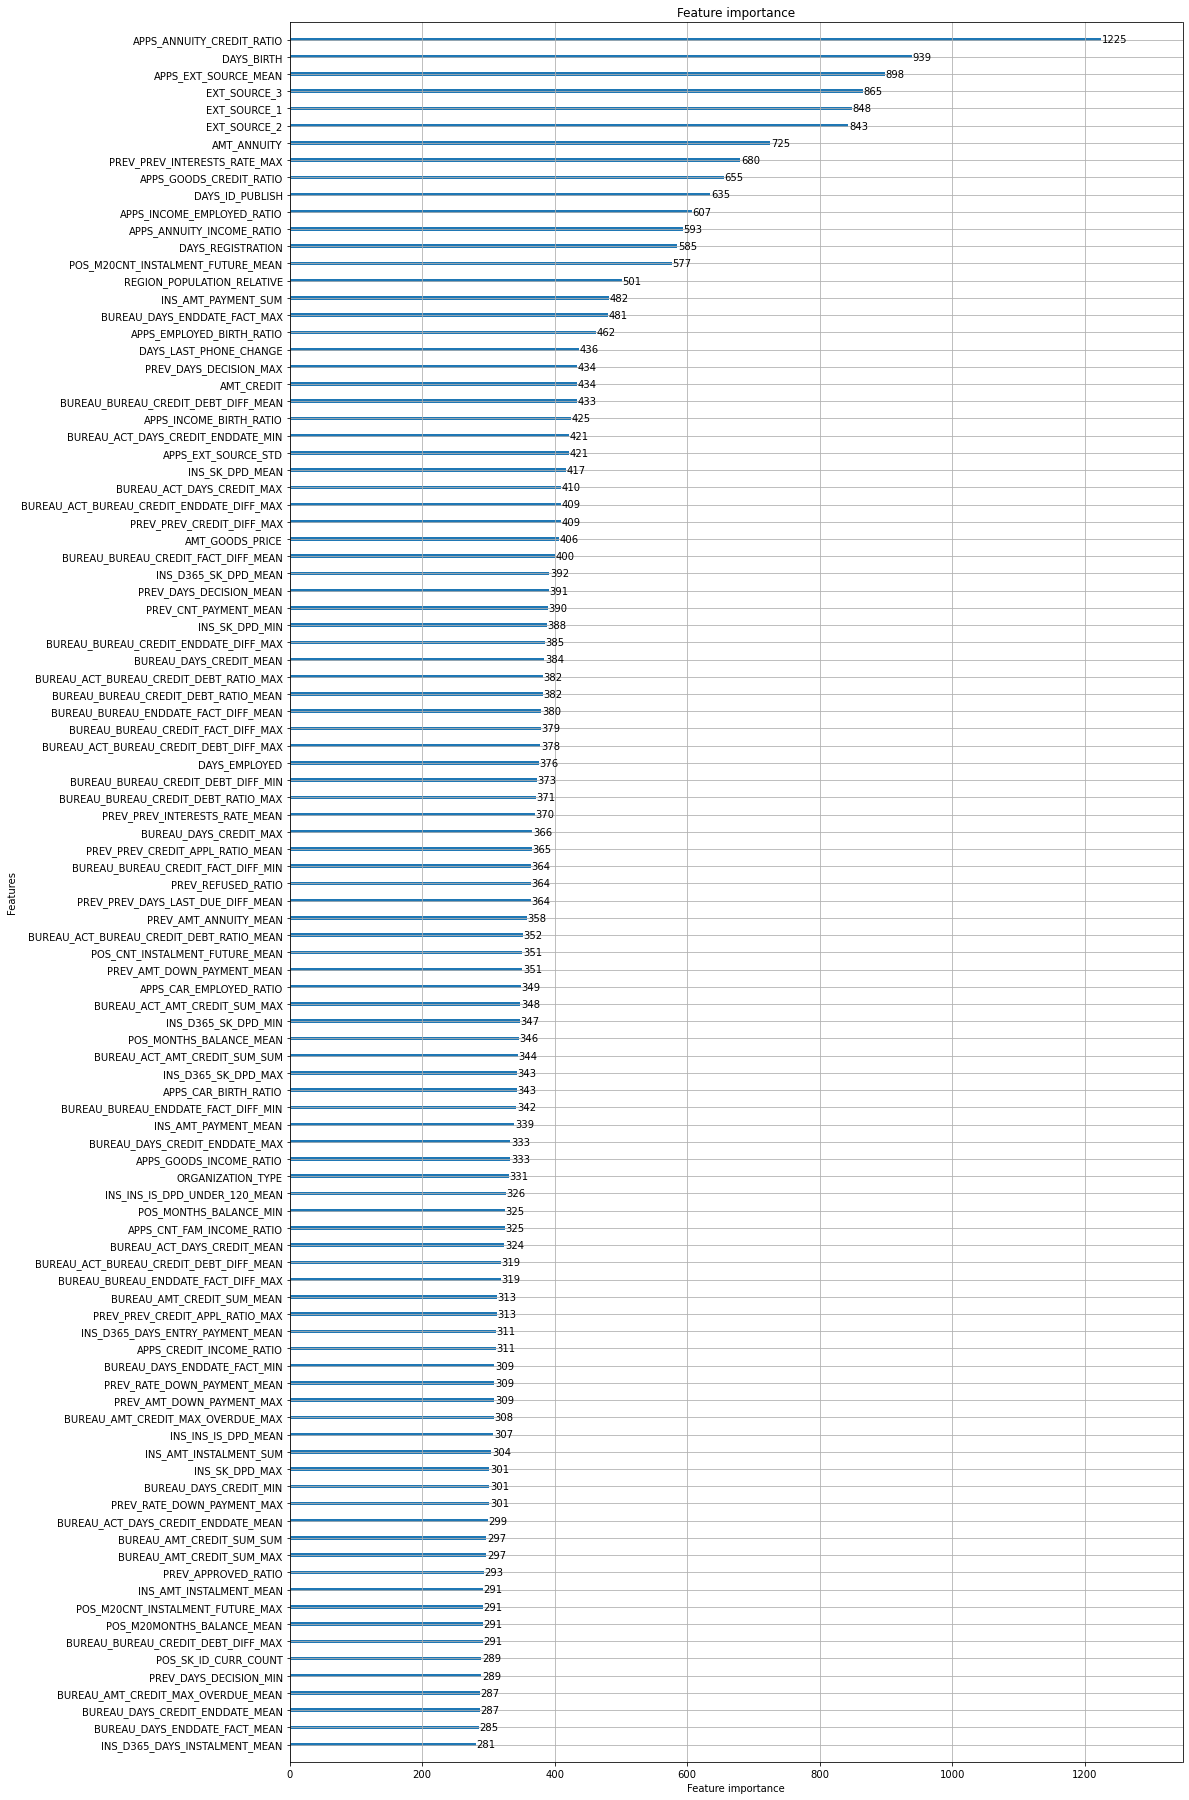

In [20]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32), max_num_features=100)